## 320 - Extracting Time Series Data from NDFD GRIB Files

[Youtube](https://www.youtube.com/watch?v=xfqhCjZl1oY)

In [1]:
import pygrib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone
from metpy.units import units

In [2]:
grb = pygrib.open('ds.temp.bin')

In [3]:
msg = grb.message(1)

In [4]:
lats, lons = msg.latlons()

In [5]:
grb.rewind()

In [6]:
target_lat = 40.015
target_lon = -105.270

In [7]:
dist_squared = (lats - target_lat)**2 + (lons - target_lon)**2
min_idx = np.unravel_index(np.argmin(dist_squared), dist_squared.shape)

In [8]:
min_idx

(783, 731)

In [9]:
lons[min_idx]

-105.27671538425612

In [10]:
temperatures = []
times = []
for msg in grb:
    times.append(msg.validDate)
    temperatures.append(msg.values[min_idx])

In [11]:
temperatures_degf = (temperatures * units('kelvin')).to('degF')

In [12]:
datetimes_utc = [dt.replace(tzinfo = timezone.utc) for dt in times]
MST = timezone(timedelta(hours = -7))
datetimes_local = [dt.astimezone(MST) for dt in datetimes_utc]

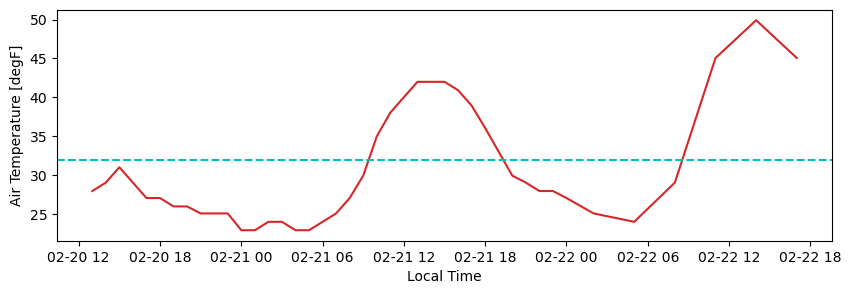

In [13]:
fig, ax = plt.subplots(figsize = (10,3))
ax.plot(datetimes_local, temperatures_degf, color = 'tab:red')
ax.set_xlabel('Local Time')
ax.set_ylabel('Air Temperature [degF]')
ax.axhline(y = 32 * units.degF, color = 'c', linestyle = '--')

In [14]:
grb = pygrib.open('ds.snow.bin')
times = []
snows = []
for msg in grb:
    times.append(msg.validDate)
    snows.append(msg.values[min_idx])

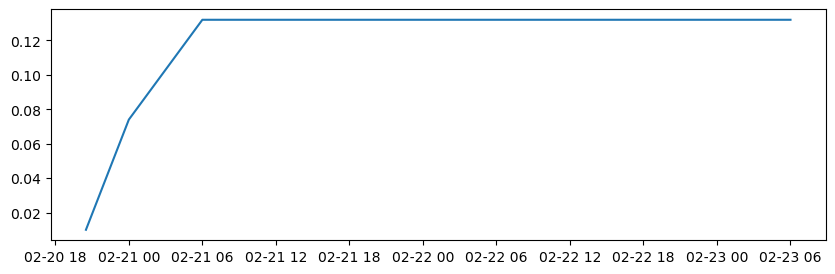

In [15]:
fig, ax = plt.subplots(figsize = (10,3))
ax.plot(times, np.cumsum(snows))